### Import data

In [1]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc_l, pop_l, g2_l, g1_l, g2_0_l, g1_0_l = setup_data("lapatinib");

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/importData.jl:37


### Hill model, residual functions and optimization

In [34]:
# #  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
# # guess
# guess = [[1.56, 0.05, 0.007, 0.008, 0.004, 0.05, 34.286, 6.56, 8.0, 7.0, 0.005, 0.035], 
# [1.8, 0.02, 0.008, 0.008, 0.03, 0.0045, 20.0, 6.0, 20.0, 10.0, 0.003, 0.02],
# [1.9, 0.03, 0.006, 0.007, 0.05, 0.0035, 15.0, 5.0, 30.0, 5.0, 0.002, 0.03],
# [2.1, 0.04, 0.007, 0.005, 0.03, 0.005, 30.0, 3.0, 20.0, 4.0, 0.003, 0.02],
# [1.8664, 0.097836, 0.00682578, 0.00958013, 0.00503788, 0.0433964, 38.941, 5.49712, 9.94827, 7.20807, 0.00294624, 0.0222821]]
# # max num of steps
# num_steps=1e4
# best_fit = zeros(5)
# params = zeros(12, 5)
# for i in 1:5 
#     best_fit[i], params[:, i] = optimize_hill(guess[i], conc_l, g1l, g2l, g1_0l, g2_0l, num_steps)
# end

guess = [125.0, 0.04, 0.007, 0.005, 0.007, 0.005, 25.0, 5.0, 0.003, 0.02]

# max num of steps
num_steps=130

# optimize and return the estimated hill parameters
best_fit, params = optimize_hill(guess, conc_l, g1_l, g2_l, g1_0_l, g2_0_l, num_steps)

# easy way to convert the hill parameters to DDE parameters
p = getDDEparams(params, conc_l)

global optimization begins ...
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 131 steps and 27.96 seconds
Termination reason: Max number of steps (130) reached
Steps per second = 4.69
Function evals per second = 7.26
Improvements/step = 0.53846
Total function evaluations = 203


Best candidate found: [61.2075, 0.0437733, 0.0102224, 0.0645205, 0.0741616, 0.0187695, 36.5999, 4.64997, 0.00446956, 0.0846488]

Fitness: 683206.047763834



6×8 Array{Float64,2}:
  0.0644071     0.0643331     0.0642109    …   0.0102224    0.0102224 
  0.0188852     0.0189608     0.0190853        0.0741616    0.0741616 
 36.5999       36.5999       36.5999          36.5999      36.5999    
  4.64997       4.64997       4.64997          4.64997      4.64997   
  9.33478e-6    1.54304e-5    2.54836e-5       0.00446956   0.00446956
  0.000176791   0.000292235   0.000482634  …   0.0846488    0.0846488 

### Plot the data with the new set of parameters for DDE

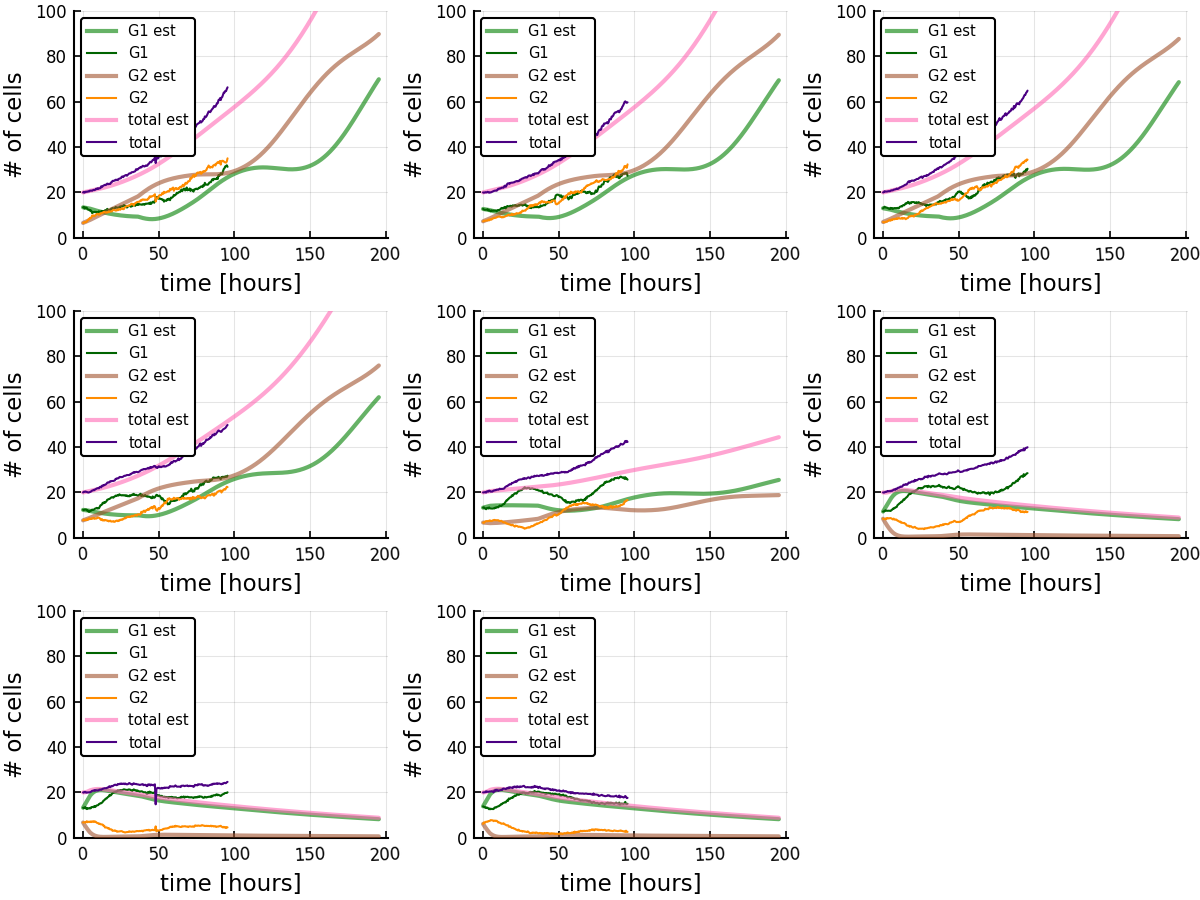

In [38]:
# easy way to convert the hill parameters to DDE parameters
p1 = plotIt(p[:, 1], 1, "", :topleft)
p2 = plotIt(p[:, 2], 2, "", :topleft)
p3 = plotIt(p[:, 3], 3, "", :topleft)
p4 = plotIt(p[:, 4], 4, "", :topleft)
p5 = plotIt(p[:, 5], 5, "", :topleft)
p6 = plotIt(p[:, 6], 6, "", :topleft)
p7 = plotIt(p[:, 7], 7, "", :topleft)
p8 = plotIt(p[:, 8], 8, "", :topleft)
plot(p1, p2, p3, p4, p5, p6, p7, p8, xaxis=(font=3))
plot!(size = (800, 600))
ylims!((0.0, 100.0))

### Plot Hill curve for all of the DDE model parameters

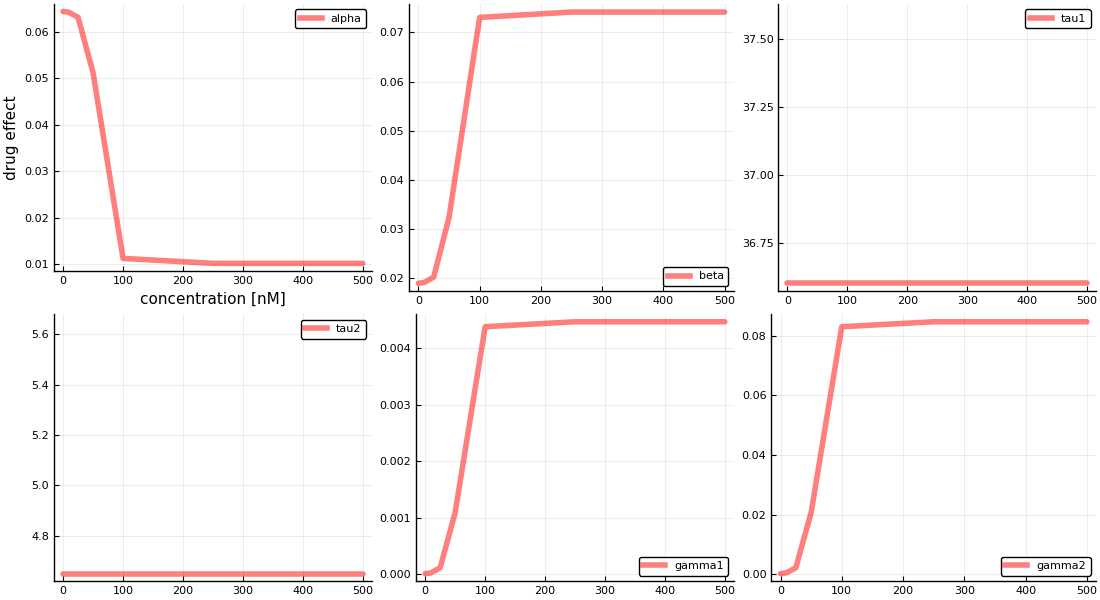

In [36]:
# plot
p__1 = plot(conc_l, p[1, :], label = "alpha", linewidth = 2, xlabel = "concentration [nM]", ylabel = "drug effect", line = (0.5, 4, :red))
p__2 = plot(conc_l, p[2, :], label = "beta", linewidth = 2, legend =:best, line = (0.5, 4, :red))
p__3 = plot(conc_l, p[3, :], label = "tau1", linewidth = 2, line = (0.5, 4, :red))
p__4 = plot(conc_l, p[4, :], label = "tau2", linewidth = 2, line = (0.5, 4, :red))
p__5 = plot(conc_l, p[5, :], label = "gamma1", linewidth = 2, line = (0.5, 4, :red))
p__6 = plot(conc_l, p[6, :], label = "gamma2", linewidth = 2, line = (0.5, 4, :red))
plot(p__1, p__2, p__3, p__4, p__5, p__6)
plot!(size = (1100, 600))